<Figure size 640x480 with 0 Axes>

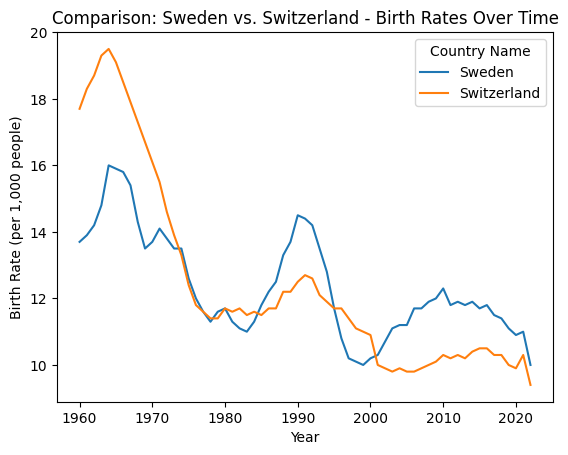

Descriptive Statistics:
               count       mean       std   min    25%   50%    75%   max
Country Name                                                            
Sweden         63.0  12.355556  1.556130  10.0  11.25  11.8  13.60  16.0
Switzerland    63.0  12.441270  2.903426   9.4  10.30  11.6  12.65  19.5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV file
# Often World Bank CSVs have metadata at the top, so try skiprows=4.
# If that doesn't align, adjust skiprows accordingly or remove it if unneeded.
df = pd.read_csv(
    "./csv-data/birth_rate_world_bank/API_SP.DYN.CBRT.IN_DS2_en_csv_v2_13718.csv",
    skiprows=4
)

# 2. Reshape data from wide to long
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Birth Rate"
).dropna(subset=["Birth Rate"])

# 3. Filter to Sweden and Switzerland only
countries_of_interest = ["Sweden", "Switzerland"]
df_compare = df_long[df_long["Country Name"].isin(countries_of_interest)]

# 4. Pivot so each country is a column; year is row index
df_pivot = df_compare.pivot(
    index="Year",
    columns="Country Name",
    values="Birth Rate"
)

# 5. Convert index to numeric to ensure proper sorting
df_pivot.index = pd.to_numeric(df_pivot.index, errors="coerce")
df_pivot.sort_index(inplace=True)

# 6. Plot: Single chart with both lines
plt.figure()
df_pivot.plot()
plt.title("Comparison: Sweden vs. Switzerland - Birth Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Birth Rate (per 1,000 people)")
plt.show()

# 7. Optional: Quick numeric summary
summary_stats = df_compare.groupby("Country Name")["Birth Rate"].describe()
print("Descriptive Statistics:\n", summary_stats)